c:\Users\dougl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


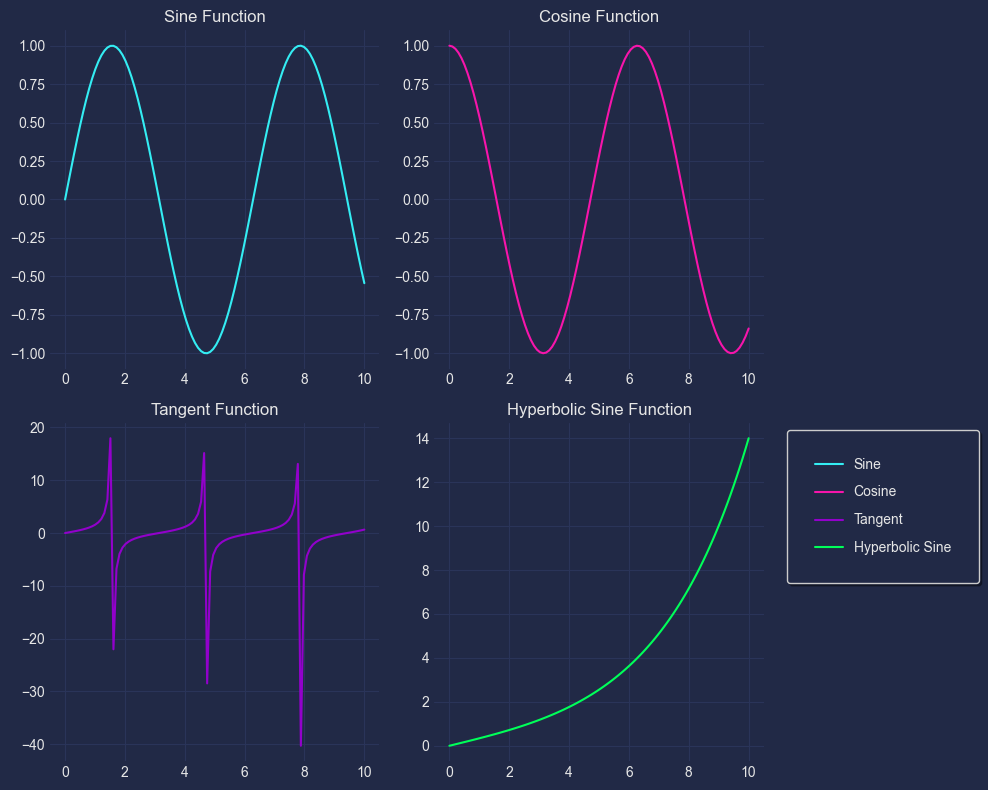

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import kagglehub
import pandas as pd

plt.style.use('cyberpunk')

palette = ['#34EDF3', '#F715AB', '#9201CB', "#00FF59"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.sinh(x / 3)
sin = axs[0, 0].plot(x, y1, color=palette[0])
axs[0, 0].set_title('Sine Function')
cos = axs[0, 1].plot(x, y2, color=palette[1])
axs[0, 1].set_title('Cosine Function')
tang = axs[1, 0].plot(x, y3, color=palette[2])
axs[1, 0].set_title('Tangent Function')
hyp_sin = axs[1, 1].plot(x, y4, color=palette[3])
axs[1, 1].set_title('Hyperbolic Sine Function')
# Add all line objects from all axes to a single legend in axs[0,1]
lines = sin + cos + tang + hyp_sin
labels = ['Sine', 'Cosine', 'Tangent', 'Hyperbolic Sine']
axs[1, 1].legend(lines, labels, shadow = True,frameon = True,bbox_to_anchor=(1.05, 1),borderpad = 2,labelspacing=1,fancybox = True, loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
dataset_path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

Regressão Logistica

In [6]:
data_set = pd.read_csv("C:\\Users\\dougl\\.cache\\kagglehub\\datasets\\dileep070\\heart-disease-prediction-using-logistic-regression\\versions\\1\\framingham.csv")
data_set_filtered = data_set.dropna()

sample = data_set_filtered.sample(n=int(len(data_set_filtered)*0.8), random_state=42)
test_data = data_set_filtered.drop(sample.index)


sample.describe()
test_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,0.459016,49.546448,1.953552,0.506831,9.342896,0.038251,0.005464,0.293716,0.032787,236.924863,132.105874,82.549180,25.758019,75.564208,81.140710,0.142077
std,0.498658,8.734370,1.007781,0.500295,11.964090,0.191934,0.073770,0.455775,0.178200,43.660374,21.371880,11.556098,3.860708,12.306059,23.681612,0.349367
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,90.000000,57.000000,17.710000,48.000000,43.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,118.375000,74.875000,23.080000,67.000000,70.000000,0.000000
50%,0.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.000000,82.000000,25.430000,75.000000,77.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,142.000000,88.000000,28.040000,82.000000,86.250000,0.000000
max,1.000000,70.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,439.000000,248.000000,130.000000,44.090000,143.000000,386.000000,1.000000


(2924, 3) (732, 3)


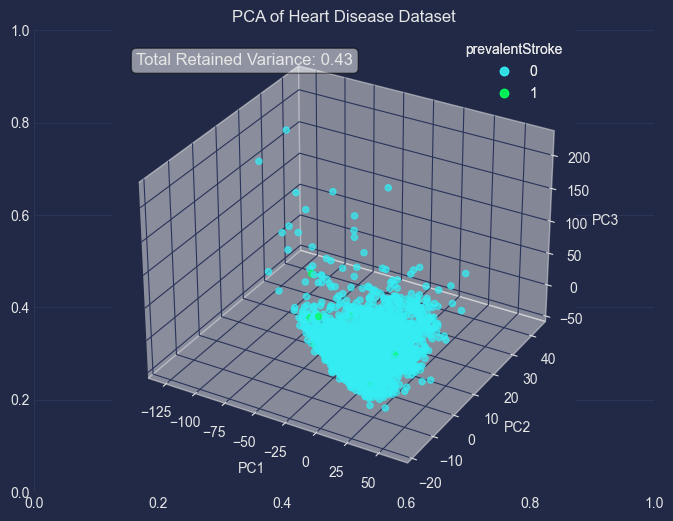

In [ ]:
from PCA import compute_pca,pca_transform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

colormap = LinearSegmentedColormap.from_list("neon", palette, N= 100)

exclude_target = sample.drop(columns=['TenYearCHD'])
n = 3
eigenvectors, eigenvalues = compute_pca(exclude_target.values, n_components=n)
transformed_data = pca_transform(exclude_target.values, n_components=n)


fig, ax = plt.subplots(figsize=(8, 6))
# 3D scatter plot using the first three principal components
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], 
                     c=sample['TenYearCHD'], cmap=colormap, alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="TenYearCHD")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
retained_variance = np.sum(eigenvalues) / len(sample.columns)

ax.text2D(0.05, 0.95, f'Total Retained Variance: {retained_variance:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", fc="w", alpha=0.5))
ax.add_artist(legend1)
ax.set_title('PCA of Heart Disease Dataset')
#so, 9 features explain 80% of variance
features_that_i_will_use = eigenvectors[:, :n]
sample_reduced = np.dot(exclude_target.values, features_that_i_will_use)
test_data_reduced = np.dot(test_data.drop(columns=['prevalentStroke']).values, features_that_i_will_use)
print(sample_reduced.shape, test_data_reduced.shape)

In [8]:
# Results with Sklearn, but i want to code it from scratch later
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y = sample['prevalentStroke'].values
Y_test = test_data['prevalentStroke'].values

X = sample_reduced
X_test = test_data_reduced

model = LogisticRegression(max_iter=1000)
model.fit(X, Y)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
confusion = confusion_matrix(Y_test,Y_pred)
print(confusion)
print('Classification Report:')
print(classification_report(Y_test, Y_pred))
#=> even with only 3 feature my model can predict with  99% acuracy
plt.show()


Accuracy: 0.99
Confusion Matrix:
[[728   0]
 [  4   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       728
           1       0.00      0.00      0.00         4

    accuracy                           0.99       732
   macro avg       0.50      0.50      0.50       732
weighted avg       0.99      0.99      0.99       732



c:\Users\dougl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dougl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dougl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [29]:
import time
import numpy as np
import matplotlib.pyplot as plt

tol = 1e-9
maxIterations = 1000

def timer(func):
    def wrapper(*args, **kwargs):
        if kwargs.get('markTime', False):
            start = time.time()
            result = func(*args, **kwargs)
            end = time.time()
            print(f"Execution time: {end - start:.6f} seconds")
            return result
        else:
            return func(*args, **kwargs)
    return wrapper


def GradientDescent(alfa, grad_func, b, verbose=True):
    losses = []
    for i in range(maxIterations):
        g = grad_func(b)
        
        if verbose and i % 100 == 0:
            predictions = 1 / (1 + np.exp(-X @ b))
            loss = -np.mean(Y * np.log(predictions + 1e-15) + 
                           (1 - Y) * np.log(1 - predictions + 1e-15))
            losses.append(loss)
            print(f"Iteration {i}, Loss: {loss:.6f}, Grad norm: {np.linalg.norm(g):.6f}")
        
        if np.linalg.norm(g) < tol:
            print(f"Converged at iteration {i}")
            return b
        
        b -= alfa * g
    
    return b

class LogisticRegression:
    def __init__(self, X, Y, b0, learning_rate=0.001):
        self.X = X
        self.Y = Y 
        self.alfa = learning_rate
        self.beta = b0

        self.methods = {"Gradient Descent": GradientDescent}

    def inv_Logistic_link(self, theta):
        return 1 / (1 + np.exp(-theta))

    def grad(self, theta):
        predictions = self.inv_Logistic_link(self.X @ theta)
        return self.X.T @ (predictions - self.Y)

    @timer
    def optimize(self, alfa=None, method="Gradient Descent", markTime=False):
        if alfa is None: alfa = self.alfa
        return self.methods[method](alfa, self.grad, self.beta.copy())

    @classmethod
    def Logistic_link(cls, theta):
        
        epsilon = 1e-15
        theta = np.clip(theta, epsilon, 1 - epsilon)
        return np.log(theta / (1 - theta))


b_0 = np.zeros(sample_reduced.shape[1])

X = sample_reduced
Y = sample['prevalentStroke'].values
X_test = test_data_reduced

print("Initial dot product:", np.inner(X[0], b_0))
print("Initial weights:", b_0)


model = LogisticRegression(X, Y, b_0, learning_rate=0.1)
final_b = model.optimize(markTime=True)

print("Optimized weights:", final_b)

accuracy = accuracy_score(Y_test, model.inv_Logistic_link(X_test @ final_b) >= 0.5)
print(f'Custom Logistic Regression Accuracy: {accuracy:.2f}')

Initial dot product: 0.0
Initial weights: [0. 0. 0.]
Iteration 0, Loss: 0.693147, Grad norm: 279306.762213
Iteration 100, Loss: 0.200807, Grad norm: 3612.755304
Iteration 200, Loss: 0.200807, Grad norm: 3612.755304
Iteration 300, Loss: 0.200807, Grad norm: 3612.755304
Iteration 400, Loss: 0.200807, Grad norm: 3612.755304
Iteration 500, Loss: 0.200807, Grad norm: 3612.755304
Iteration 600, Loss: 0.200807, Grad norm: 3612.755304


C:\Users\dougl\AppData\Local\Temp\ipykernel_11512\3961219658.py:51: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-theta))
C:\Users\dougl\AppData\Local\Temp\ipykernel_11512\3961219658.py:27: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ b))


Iteration 700, Loss: 0.200807, Grad norm: 3612.755304
Iteration 800, Loss: 0.200807, Grad norm: 3612.755304
Iteration 900, Loss: 0.200807, Grad norm: 3612.755304
Execution time: 0.310976 seconds
Optimized weights: [ 35161.97909749 -10463.44626303  -5225.35867229]
Custom Logistic Regression Accuracy: 0.99
